In [8]:
import anndata as ad
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

# print version of anndata
import anndata as ad
print("AnnData version:", ad.__version__)

AnnData version: 0.12.1


Import Raw Fly data and inspect

In [10]:
# Read in AnnData object (replace 'your_file.h5ad' with your file path)
ad = ad.read_h5ad('fly_original.h5ad')

# View basic information about the AnnData object
print(ad)
print("Shape:", ad.shape)
print("Observations (obs):", ad.obs.head())
print("Variables (var):", ad.var.head())

# Look at expression data
print("Expression data (X):", ad.X[:5])  # Display first

AnnData object with n_obs × n_vars = 289981 × 15992
    obs: 'tissue', 'sex', 'age', 'sex_age', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'log1p_total_counts_mt', 'dataset', 'fca_annotation', 'afca_annotation', 'afca_annotation_broad'
    var: 'gene_ids', 'geneName'
Shape: (289981, 15992)
Observations (obs):                                           tissue     sex age    sex_age  \
AAACCCACAGTGAGCA-1_AFCA_female_head_30_S1   head  female  30  female_30   
AAACCCAGTCCGACGT-1_AFCA_female_head_30_S1   head  female  30  female_30   
AAACCCAGTCTTGAGT-1_AFCA_female_head_30_S1   head  female  30  female_30   
AAACCCATCGCCAACG-1_AFCA_female_head_30_S1   head  female  30  female_30   
AAACGCTGTAGCTGAG-1_AFCA_female_head_30_S1   head  female  30  female_30   

                                           n_genes_by_counts  total_counts  \
AAACCCACAGTGAGCA-1_AFCA_female_head_30_S1                853          2643   
AAA


Datasets and cell counts:
dataset
AFCA    189670
FCA     100311
Name: count, dtype: int64

Dataset × age table:
age           5     30     50     70
dataset                             
AFCA          0  61808  73575  54287
FCA      100311      0      0      0


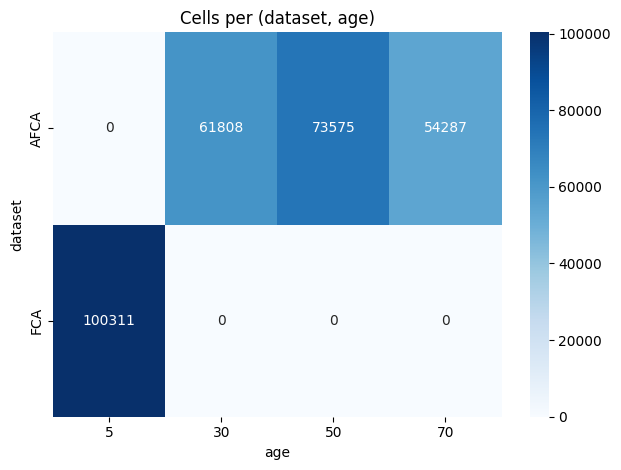

/home/nikolaitennant/projects/TimeFlies/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-07-26 13:20:21.093673: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-26 13:20:21.287594: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753532421.355605  299483 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753532421.374944  299483 cud

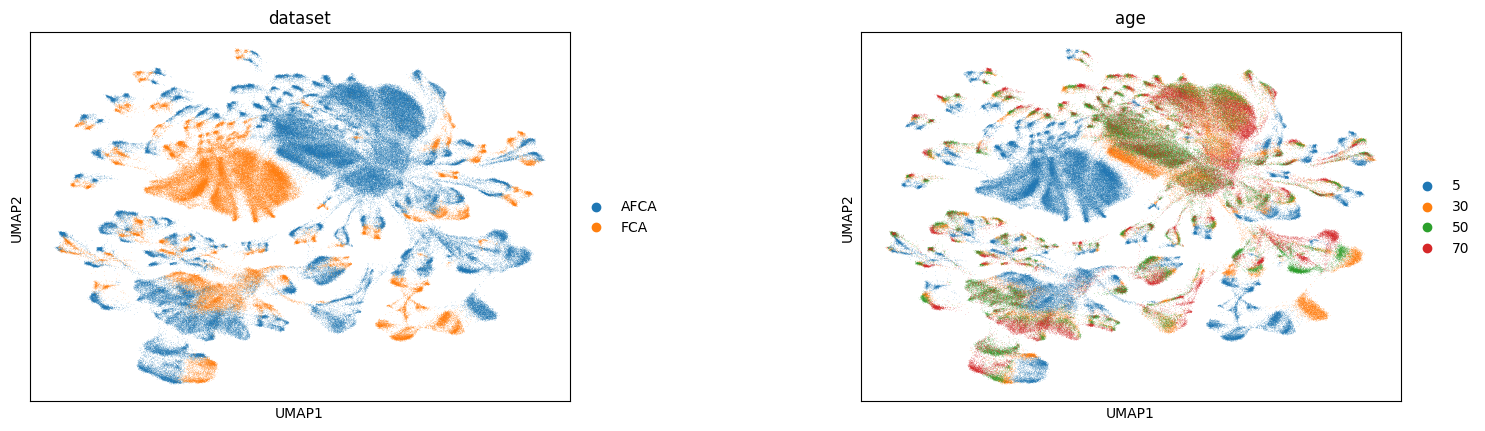

In [11]:
# 1. Basic frequencies
print("\nDatasets and cell counts:")
print(ad.obs["dataset"].value_counts())

# 2. Cross‑tab with age
ct = pd.crosstab(ad.obs["dataset"], ad.obs["age"])
print("\nDataset × age table:")
print(ct)

# Optional: visualise the crosstab
sns.heatmap(ct, annot=True, fmt="d", cmap="Blues")
plt.title("Cells per (dataset, age)")
plt.tight_layout(); plt.show()

# 3. UMAP coloured by dataset vs. age (on log‑CP10K)
sc.pp.normalize_total(ad, target_sum=1e4)
sc.pp.log1p(ad)
sc.pp.pca(ad)
sc.pp.neighbors(ad)
sc.tl.umap(ad)

sc.pl.umap(ad, color=["dataset", "age"], wspace=0.4)

Import Batch corrected Fly data and inspect

In [4]:
# Read in AnnData object (replace 'your_file.h5ad' with your file path)
adata = ad.read_h5ad('fly_original_batch.h5ad')

# View basic information about the AnnData object
print(adata)
print("Shape:", adata.shape)
print("Observations (obs):", adata.obs.head())
print("Variables (var):", adata.var.head())

# Look at expression data
print("Expression data (X):", adata.X[:5])  # Display first

AnnData object with n_obs × n_vars = 289981 × 15992
    obs: 'tissue', 'sex', 'age', 'sex_age', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'log1p_total_counts_mt', 'dataset', 'fca_annotation', 'afca_annotation', 'afca_annotation_broad', '_scvi_batch', '_scvi_labels'
    var: 'gene_ids', 'geneName'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'log1p'
    obsm: 'X_scVI'
    layers: 'counts', 'scvi_normalized'
Shape: (289981, 15992)
Observations (obs):                                           tissue     sex age    sex_age  \
AAACCCACAGTGAGCA-1_AFCA_female_head_30_S1   head  female  30  female_30   
AAACCCAGTCCGACGT-1_AFCA_female_head_30_S1   head  female  30  female_30   
AAACCCAGTCTTGAGT-1_AFCA_female_head_30_S1   head  female  30  female_30   
AAACCCATCGCCAACG-1_AFCA_female_head_30_S1   head  female  30  female_30   
AAACGCTGTAGCTGAG-1_AFCA_female_head_30_S1   head  female  30  female_30   

                

Inspect Layer Info

In [5]:
# Display the names of the available layers
print("Available layers:", list(adata.layers.keys()))

# Show a preview of the first 5 rows and 5 columns from each layer
for layer_name in adata.layers.keys():
    print(f"\nPreview of layer '{layer_name}':")
    print(adata.layers[layer_name][:5, :5])

Available layers: ['counts', 'scvi_normalized']

Preview of layer 'counts':
<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 5 stored elements and shape (5, 5)>
  Coords	Values
  (0, 2)	1.0
  (1, 2)	1.0
  (3, 2)	1.0
  (4, 1)	1.0
  (4, 2)	2.0

Preview of layer 'scvi_normalized':
[[6.0894424e-01 2.9476009e+01 6.3963131e+01 6.1716789e-01 6.3869232e-01]
 [8.3362401e-01 6.0481113e+01 9.8368744e+01 5.3602237e-01 1.4689569e-01]
 [1.2513897e-01 5.2969517e+01 9.5559921e+01 9.6699707e-02 5.7552448e-03]
 [5.9774864e-01 4.1205654e+01 9.3567574e+01 9.9154496e-01 4.8414618e-01]
 [7.2002858e-01 3.6753357e+01 7.2122063e+01 5.1717097e-01 1.6123153e+00]]
